In [39]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
import gensim
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
# nltk.download('stopwords')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelBinarizer

In [40]:
dataframe1=pd.read_csv('hour.csv')
dataframe1.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [41]:
dataframe1.shape

(17379, 17)

In [42]:
dataframe2=pd.read_csv('hour.csv')
dataframe2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
dataframe2.shape

(17379, 17)

In [44]:
dataframe1.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [45]:
dataframe2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### The target variable we got is cnt which is a continous variable

Checkingfor null values

In [46]:
dataframe1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 ###### Now , plot the count plots for various discrete variables .  the various discrete variables are season, holiday, weather etc

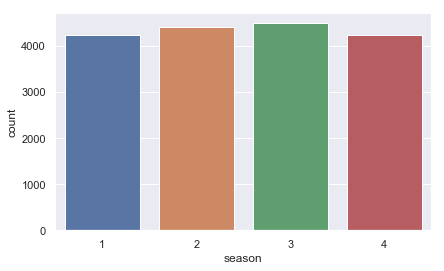

In [47]:
sns.set(style="darkgrid")
ax=sns.countplot(x="season",data=dataframe1)
ax

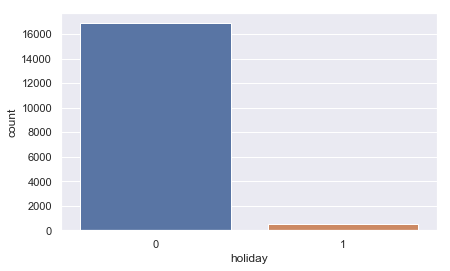

In [48]:
sns.set(style="darkgrid")
ax=sns.countplot(x="holiday",data=dataframe1)
ax

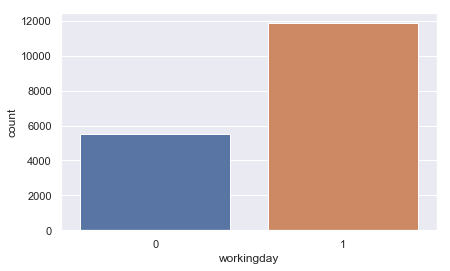

In [49]:
sns.set(style="darkgrid")
ax=sns.countplot(x="workingday",data=dataframe1)
ax

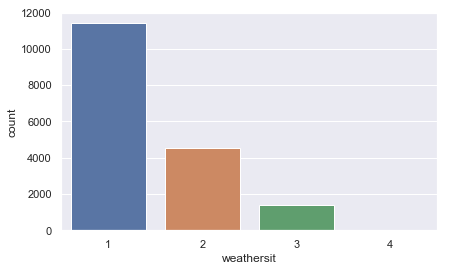

In [50]:
sns.set(style="darkgrid")
ax=sns.countplot(x="weathersit",data=dataframe1)
ax

##### Now, lets check histogram plots for our continous features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000148BFF60>]],
      dtype=object)

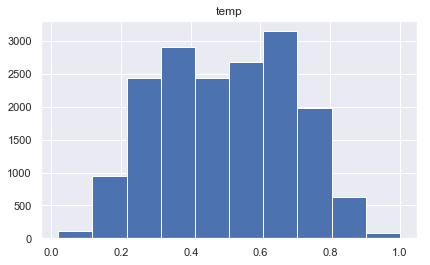

In [51]:
dataframe1.hist('temp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000162B6668>]],
      dtype=object)

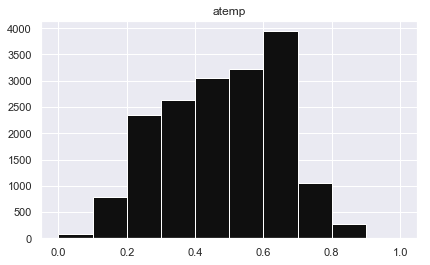

In [52]:
dataframe1.hist('atemp',color='#0f0f0f')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016BC0128>]],
      dtype=object)

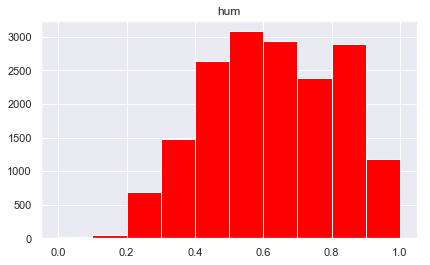

In [53]:
dataframe1.hist('hum',color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015CC6F60>]],
      dtype=object)

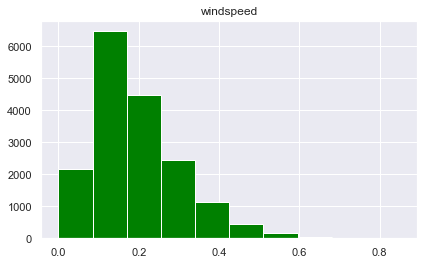

In [54]:
dataframe1.hist('windspeed',color='green')

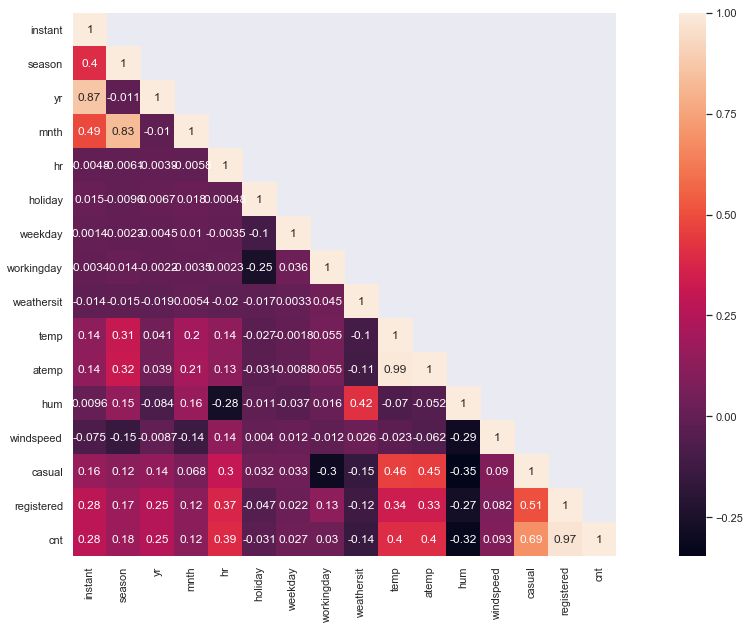

In [55]:
corrMat = dataframe1.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots(figsize=(20,10))
sns.heatmap(corrMat, mask=mask,vmax=1., square=True,annot=True)

#####  from the above correlation plot , temp/atemp are highly correlated. hence, one of them can be removed
#### cnt is highly correlated with registered (so that's an important feature to predict demand)

In [18]:
dataframe1=dataframe1.drop(['atemp'],axis=1)
dataframe1.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40


#### we eliminated 'atemp' because , it's just an assumption of 'temp' and not original value

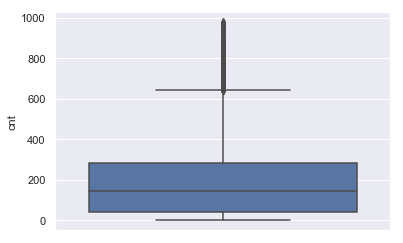

In [19]:
sns.boxplot(data = dataframe1,y='cnt',orient='v')
plt.show()

#### In the graph above, we can see that the count value is very large. In other words, we can see that there are many outliers. Let's look at the other variables to see how much of these exist. Let's divide the column for weather and the column for categorical.

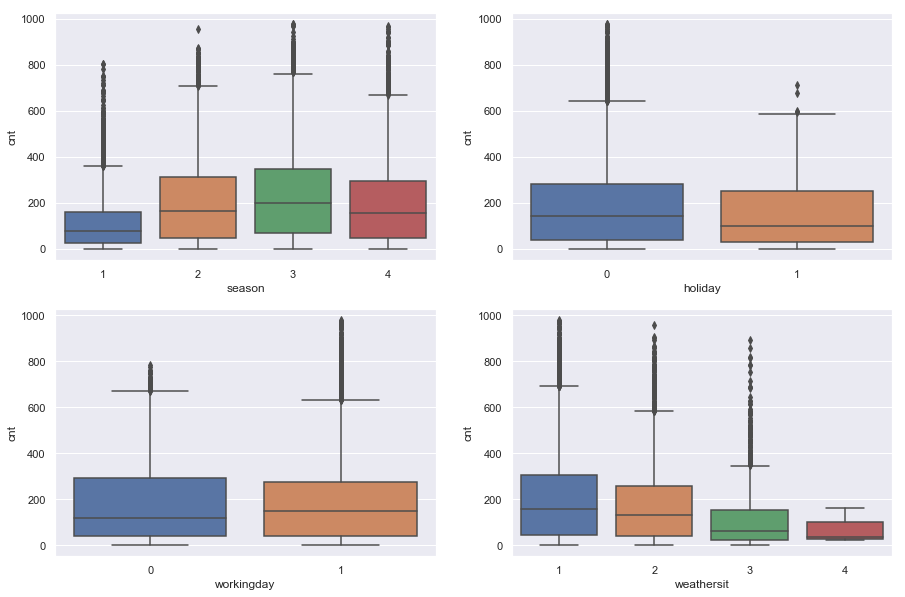

In [20]:
fig,axes = plt.subplots(ncols=2 ,nrows=2)
fig.set_size_inches(15,10)
sns.boxplot(data=dataframe1,x='season',y='cnt',ax=axes[0][0])
sns.boxplot(data=dataframe1,x='holiday',y='cnt',ax=axes[0][1])
sns.boxplot(data=dataframe1,x='workingday',y='cnt',ax=axes[1][0])
sns.boxplot(data=dataframe1,x='weathersit',y='cnt',ax=axes[1][1])

#### The graph above shows a few things

-------->Season shows that the spring is lower than the summer, autumn and winter counts.

-------->It can be seen that there are quite a lot of outliers for Count.In Workingday, outlier is higher when you work than when you are not working.

-------->Let's look at the relationship between the weather (temp,humidity, windspeed) and Count. Weather data can be viewed as Numeric data. Therefore, let's get the correlation coefficient and visualize.

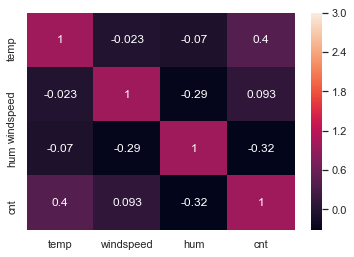

In [21]:
corrs=dataframe1[['temp','windspeed','hum','cnt']].corr()
sns.heatmap(corrs,annot=True,vmax=3)

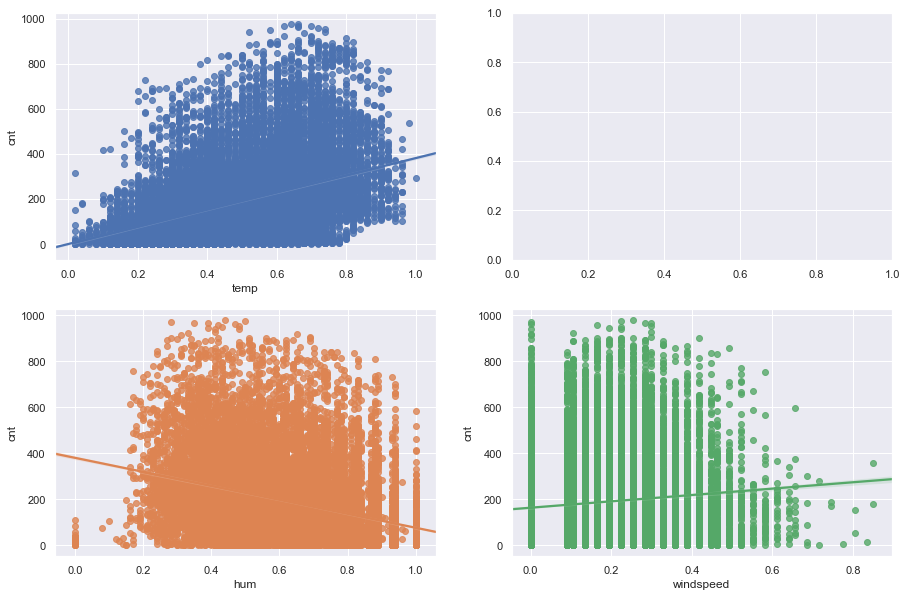

In [22]:
fig,axes=plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(15,10)
sns.regplot(data=dataframe1,x='temp',y='cnt',ax=axes[0][0])
sns.regplot(data=dataframe1,x='hum',y='cnt',ax=axes[1][0])
sns.regplot(data=dataframe1,x='windspeed',y='cnt',ax=axes[1][1])
plt.show()

In [23]:
from time import time
dataframe1['dteday'] = pd.to_datetime(dataframe1['dteday'])    
dataframe1['dteday'] = (dataframe1['dteday'] - dataframe1['dteday'].min()) / np.timedelta64(1,'D')

##### Now , lets break our data into train and test

In [24]:
X_train,X_test,y_train,y_test = train_test_split(dataframe1,dataframe1['cnt'],
                                                    test_size=0.30, 
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(12165, 16)
(5214, 16)


### Building a decision tree regressor

In [25]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.983060312411
R-Squaredon test dataset=0.984149201146


In [26]:
param_grid = {"criterion": ["mse", "mae"],"min_samples_split": [10, 20, 40],"max_depth": [2, 6, 8],"min_samples_leaf": [20, 40, 100],"max_leaf_nodes": [5, 20, 100]}
grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=3,verbose=10)
grid_cv_dtm.fit(X_train,y_train)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=20 
[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=20, score=0.935380892779, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=20 
[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=20, score=0.932530018258, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=20 
[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=20, score=0.936306367905, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=20 
[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=20, score=0.935380892779, total=   0.0s
[CV] min_samples_split=20, max_leaf_n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40, score=0.935380892779, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40 
[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40, score=0.932530018258, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40 
[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40, score=0.936306367905, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40 
[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40, score=0.935380892779, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40 
[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=2, min_samples_leaf=40, score

[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=2, min_samples_leaf=100, score=0.978451129388, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=2, min_samples_leaf=100 
[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=2, min_samples_leaf=100, score=0.977532254623, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=2, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=2, min_samples_leaf=100, score=0.978430025215, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=2, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=2, min_samples_leaf=100, score=0.978451129388, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=2, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=2, min_sampl

[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=20, score=0.936306367905, total=   0.0s
[CV] min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=20, score=0.935380892779, total=   0.0s
[CV] min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=20, score=0.932530018258, total=   0.0s
[CV] min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=20, score=0.936306367905, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=40 
[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mse, max_depth=6, min_samples_leaf=40, score

[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_leaf=100, score=0.993826427358, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_leaf=100 
[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_leaf=100, score=0.995506692, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_leaf=100, score=0.993450377172, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_leaf=100, score=0.993826427358, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mse, max_depth=6, min_samples_

[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20, score=0.932530018258, total=   0.0s
[CV] min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20 
[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20, score=0.936306367905, total=   0.0s
[CV] min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20, score=0.935380892779, total=   0.0s
[CV] min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20, score=0.932530018258, total=   0.0s
[CV] min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=5, criterion=mse, max_depth=8, min_samples_leaf=20, score

[CV]  min_samples_split=40, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_leaf=40, score=0.995730747855, total=   0.0s
[CV] min_samples_split=40, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_leaf=40 
[CV]  min_samples_split=40, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_leaf=40, score=0.995781357404, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_leaf=100 
[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_leaf=100, score=0.993450377172, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_leaf=100 
[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_leaf=100, score=0.993826427358, total=   0.0s
[CV] min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_leaf=100 
[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mse, max_depth=8, min_samples_

[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20, score=0.940733867426, total=   2.5s
[CV] min_samples_split=10, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20 
[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20, score=0.939306954381, total=   2.4s
[CV] min_samples_split=10, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20 
[CV]  min_samples_split=10, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20, score=0.940427273403, total=   2.4s
[CV] min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20 
[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20, score=0.940733867426, total=   2.3s
[CV] min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20 
[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=2, min_samples_leaf=20, score

[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=40, score=0.967983202334, total=   3.2s
[CV] min_samples_split=10, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=40 
[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=40, score=0.96698336855, total=   3.0s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=40 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=40, score=0.969072061429, total=   2.9s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=40 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=40, score=0.967983202334, total=   2.7s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=40 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=2, min_samples_leaf=4

[CV]  min_samples_split=10, max_leaf_nodes=100, criterion=mae, max_depth=2, min_samples_leaf=100, score=0.967983202334, total=   3.0s
[CV] min_samples_split=10, max_leaf_nodes=100, criterion=mae, max_depth=2, min_samples_leaf=100 
[CV]  min_samples_split=10, max_leaf_nodes=100, criterion=mae, max_depth=2, min_samples_leaf=100, score=0.96698336855, total=   2.9s
[CV] min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=2, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=2, min_samples_leaf=100, score=0.969072061429, total=   2.8s
[CV] min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=2, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=2, min_samples_leaf=100, score=0.967983202334, total=   3.5s
[CV] min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=2, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=2, m

[CV]  min_samples_split=10, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20, score=0.99581160639, total=   3.5s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20, score=0.995294717471, total=   3.3s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20, score=0.994665025741, total=   3.3s
[CV] min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20 
[CV]  min_samples_split=20, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20, score=0.99581160639, total=   3.4s
[CV] min_samples_split=40, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=20, criterion=mae, max_depth=6, min_samples_leaf=20

[CV]  min_samples_split=10, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samples_leaf=40, score=0.998937343428, total=   3.1s
[CV] min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samples_leaf=40 
[CV]  min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samples_leaf=40, score=0.999202171054, total=   2.9s
[CV] min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samples_leaf=40 
[CV]  min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samples_leaf=40, score=0.999242818691, total=   3.2s
[CV] min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samples_leaf=40 
[CV]  min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samples_leaf=40, score=0.998937343428, total=   3.1s
[CV] min_samples_split=40, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samples_leaf=40 
[CV]  min_samples_split=40, max_leaf_nodes=100, criterion=mae, max_depth=6, min_samp

[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=100, score=0.940733867426, total=   2.9s
[CV] min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=100, score=0.939306954381, total=   2.9s
[CV] min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=100 
[CV]  min_samples_split=20, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=100, score=0.940427273403, total=   2.9s
[CV] min_samples_split=40, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=100 
[CV]  min_samples_split=40, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=100, score=0.940733867426, total=   2.6s
[CV] min_samples_split=40, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=100 
[CV]  min_samples_split=40, max_leaf_nodes=5, criterion=mae, max_depth=8, min_samples_leaf=1

[CV]  min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samples_leaf=20, score=0.999703072643, total=   3.2s
[CV] min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samples_leaf=20 
[CV]  min_samples_split=20, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samples_leaf=20, score=0.999618617231, total=   3.2s
[CV] min_samples_split=40, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samples_leaf=20, score=0.999742682267, total=   3.0s
[CV] min_samples_split=40, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samples_leaf=20, score=0.999703072643, total=   3.1s
[CV] min_samples_split=40, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samples_leaf=20 
[CV]  min_samples_split=40, max_leaf_nodes=100, criterion=mae, max_depth=8, min_samp

[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed: 12.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [10, 20, 40], 'max_leaf_nodes': [5, 20, 100], 'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8], 'min_samples_leaf': [20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [27]:
print("R-Squared ={}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared =0.999723733952
Best Hyperparameters::
{'min_samples_split': 10, 'max_leaf_nodes': 100, 'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 20}


In [28]:
# converting above results into new data frame
dfx = pd.DataFrame(data=grid_cv_dtm.cv_results_)
dfx.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.015667,0.001667,0.934739,0.935539,mse,2,5,20,10,"{u'min_samples_split': 10, u'max_leaf_nodes': ...",...,0.935381,0.935062,0.93253,0.93475,0.936306,0.936806,0.000943,4.714827e-04,0.001607,0.000905
1,0.015667,0.001333,0.934739,0.935539,mse,2,5,20,20,"{u'min_samples_split': 20, u'max_leaf_nodes': ...",...,0.935381,0.935062,0.93253,0.93475,0.936306,0.936806,0.000943,4.714266e-04,0.001607,0.000905
2,0.016000,0.002000,0.934739,0.935539,mse,2,5,20,40,"{u'min_samples_split': 40, u'max_leaf_nodes': ...",...,0.935381,0.935062,0.93253,0.93475,0.936306,0.936806,0.000817,1.123916e-07,0.001607,0.000905
3,0.018333,0.002000,0.934739,0.935539,mse,2,5,40,10,"{u'min_samples_split': 10, u'max_leaf_nodes': ...",...,0.935381,0.935062,0.93253,0.93475,0.936306,0.936806,0.001700,0.000000e+00,0.001607,0.000905
4,0.015333,0.001000,0.934739,0.935539,mse,2,5,40,20,"{u'min_samples_split': 20, u'max_leaf_nodes': ...",...,0.935381,0.935062,0.93253,0.93475,0.936306,0.936806,0.000471,0.000000e+00,0.001607,0.000905


[Text(0.5,1,'Effect of Depth and Leaf Nodes on Model Performance')]

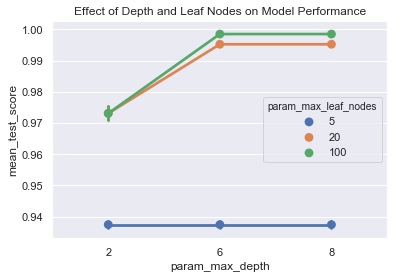

In [29]:
fig,ax = plt.subplots()
sns.pointplot(data=dfx[['mean_test_score','param_max_leaf_nodes','param_max_depth']],
y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [30]:
# Checking the training model scores
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X_train, y_train, cv=10,verbose=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X_train, y_train, cv=10,scoring='neg_mean_squared_error',verbose=10)

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ............................ , score=0.99972971404, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=0.999765662397, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=0.999815126331, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=0.999806003975, total=   0.0s
[CV]  ................................................................
[CV] ............................ , score=0.99962020031, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=0.999738164647, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=0.999728972133, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s


[CV] ........................... , score=0.999803671082, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=0.999569478784, total=   0.0s
[CV]  ................................................................
[CV] ............................ , score=0.99977011217, total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... , score=-9.36082412353, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=-7.64904882291, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=-5.71686488664, total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ........................... , score=-6.13740102571, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=-11.8563869373, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=-9.51839748845, total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s


[CV] ............................ , score=-9.1493854224, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=-7.01888956074, total=   0.0s
[CV]  ................................................................
[CV] ............................ , score=-15.176839388, total=   0.0s
[CV]  ................................................................
[CV] ........................... , score=-7.36870714557, total=   0.0s
avg R-squared::1.000
MSE::-8.895


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [31]:
best_dtm_model = grid_cv_dtm.best_estimator_
y_pred = best_dtm_model.predict(X_test)
r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

R-squared:1.000
MSE: 7.93


## Here, we got R^2 value as 1. which means, our DT regressor perfectly fits our data.

### Let's fit a linear-regression model on top of our data

In [32]:
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score
# # x=dataframe1.iloc[:,:-1].values
# # y=dataframe1.iloc[:,:1].values
# # X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# reg_linear=linear_model.LinearRegression()
# reg_linear.fit(X_train,y_train)
# y_test_pred=reg_linear.predict(X_test)

#### Visualize our data

('Coefficients: \n', array([-2.88590007e-16,  1.47690997e-14,  1.25807706e-14, -8.63779016e-15,
       -7.01639714e-15,  4.22499979e-15, -3.23945640e-14,  8.70043905e-16,
       -2.08596974e-14, -5.51090523e-14, -1.08560269e-14,  2.30465258e-13,
        4.88540852e-15,  3.33333333e-01,  3.33333333e-01,  6.66666667e-01]))
Variance score: 1.0


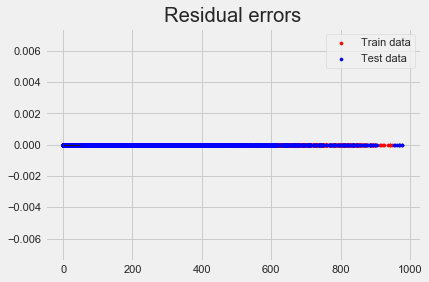

In [33]:
from sklearn import linear_model
X_train,X_test,y_train,y_test=train_test_split(dataframe1,dataframe1['cnt'],test_size=0.3,random_state=1)
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
y_pred=reg.predict(X_test)
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "red", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 1) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

### Regression metrics

In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as sm
print('performance of linear regression')
print('--------------------------------------------------')
print('Mean absolute error = ',round(sm.mean_absolute_error(y_test,y_pred),2))
print('Mean squared error = ',round(sm.mean_squared_error(y_test,y_pred),2))
print('Median absolute error = ',round(sm.median_absolute_error(y_test,y_pred),2))
print('explained variance score = ',round(sm.explained_variance_score(y_test,y_pred),2))
print('R2 score = ',round(sm.r2_score(y_test,y_pred),2))

performance of linear regression
--------------------------------------------------
('Mean absolute error = ', 0.0)
('Mean squared error = ', 0.0)
('Median absolute error = ', 0.0)
('explained variance score = ', 1.0)
('R2 score = ', 1.0)
